## Imports

In [1]:
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from scripts import settings
from scripts import utils
import pandas as pd
import numpy as np
import shap
import os

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

settings.init_paths()

root_dir /Users/kevin/Desktop/stress


## Participants, filter names,  directories, and models
#### variables

In [2]:
#participants_high_accuracy = ['aliceblackwood123@gmail.com', 'salman@nsl.inha.ac.kr', 'jumabek4044@gmail.com', 'nazarov7mu@gmail.com']
#participants_low_accuracy = ['laurentkalpers3@gmail.com', 'nnarziev@gmail.com', 'mr.khikmatillo@gmail.com']
participants_high_improvement = ['azizsambo58@gmail.com', 'nslabinha@gmail.com']
participants_low_improvement = ['jskim@nsl.inha.ac.kr', 'nnarziev@gmail.com']
participants_high_to_low_improvement = participants_high_improvement + participants_low_improvement
filter_datasets = {
    'no filter': settings.not_filtered_dataset_dir,
    'combined': settings.combined_filtered_dataset_dir,
    #'ppg': settings.ppg_filtered_dataset_dir,
    #'acc': settings.acc_filtered_dataset_dir
}
print(filter_datasets)

{'no filter': '/Users/kevin/Desktop/stress/data/processed dataset/1. not filtered dataset', 'combined': '/Users/kevin/Desktop/stress/data/processed dataset/4. combined filtered dataset'}


#### train & test

azizsambo58@gmail.com, no filter, test feature vectors=12150, shap values=12150, f1=0.49, roc_auc=0.54


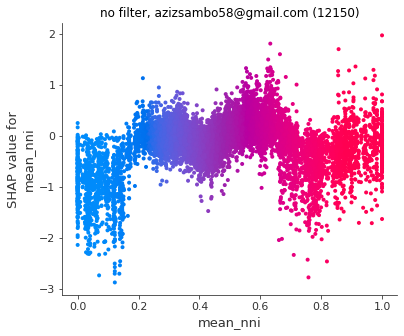

azizsambo58@gmail.com, combined, test feature vectors=12150, shap values=12150, f1=0.64, roc_auc=0.74


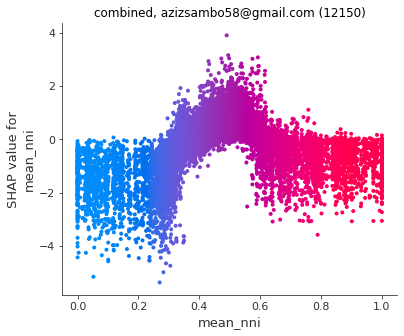

nslabinha@gmail.com, no filter, test feature vectors=1500, shap values=1500, f1=0.58, roc_auc=0.66


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


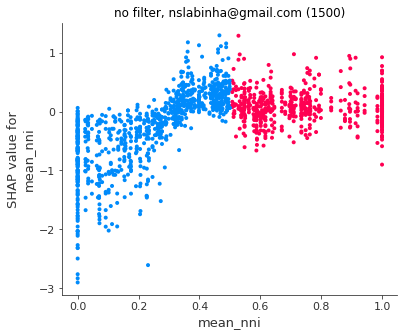

The least populated class in y has only 4 members, which is less than n_splits=5.


nslabinha@gmail.com, combined, test feature vectors=1450, shap values=1450, f1=0.70, roc_auc=0.79


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


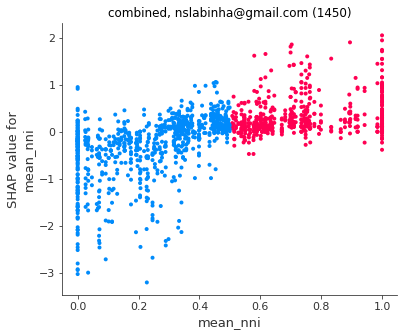

jskim@nsl.inha.ac.kr, no filter, test feature vectors=14850, shap values=14850, f1=0.66, roc_auc=0.74


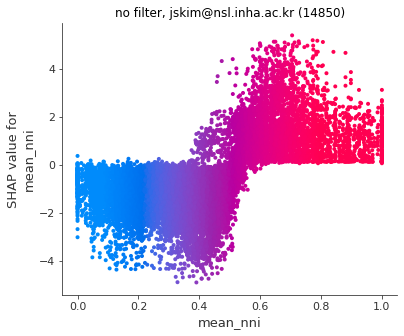

jskim@nsl.inha.ac.kr, combined, test feature vectors=14850, shap values=14850, f1=0.67, roc_auc=0.77


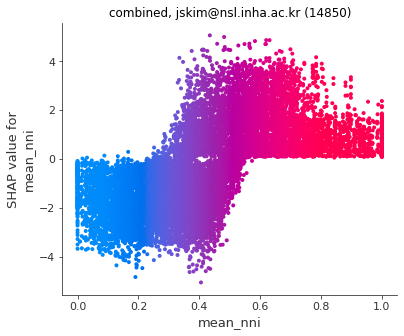

nnarziev@gmail.com, no filter, test feature vectors=36600, shap values=36600, f1=0.60, roc_auc=0.66


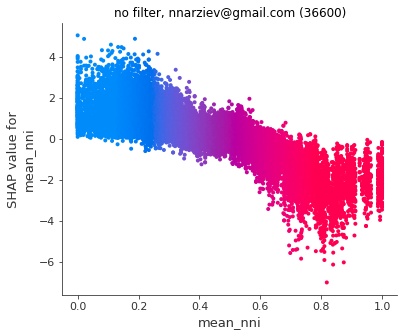

nnarziev@gmail.com, combined, test feature vectors=36600, shap values=36600, f1=0.62, roc_auc=0.68


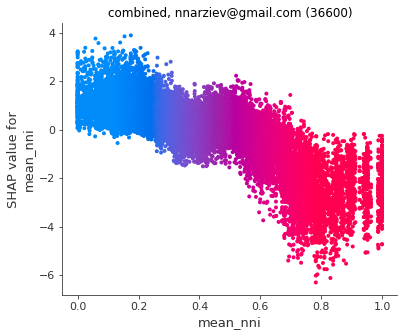

In [3]:
for participant in participants_high_to_low_improvement:
    for filter_name in filter_datasets.keys():
        # train models and get test features
        all_models, all_test_features, all_test_scores, confusion_matrix = utils.participant_train_for_model(
            participant=participant,
            train_dir=filter_datasets[filter_name]
        )
        
        # calculate shap values
        shap_values = []
        for sub_model, sub_test_features, sub_test_scores in zip(all_models, all_test_features, all_test_scores):
            tree_explainer = shap.TreeExplainer(sub_model)
            sub_shap_values = tree_explainer.shap_values(sub_test_features, tree_limit=sub_model.best_ntree_limit)
            shap_values += [sub_shap_values]
        shap_values = np.vstack(shap_values)
        test_features = pd.concat(all_test_features, axis=0)
        
        # print accuracy
        f1 = sum([f1 for f1, _ in all_test_scores]) / len(all_test_scores)
        roc_auc = sum([roc_auc for _, roc_auc in all_test_scores]) / len(all_test_scores)
        print(f'{participant}, {filter_name}, f1={f1:.2f}, roc_auc={roc_auc:.2f}')

        # plot shap summary plot - e.g., view all feature impacts to the tests
        # shap.summary_plot(
        #     shap_values,
        #     test_features,
        #     sort=True,
        #     show=False
        # )
        # plt.xlim(-6, 6)
        plt.title(f'{filter_name}, {participant} ({len(shap_values)} shap values)')
        plt.show()
        
        # plot shap dependence plot - e.g., view correlation between impacts of two features
        shap.dependence_plot(
            'mean_nni',
            shap_values,
            test_features,
            interaction_index='mean_nni',
            show=False
        )
        plt.ylim(-5, 5)
        plt.title(f'{filter_name}, {participant} ({len(shap_values)} shap values)')
        plt.show()
        
        # shap values
        pd.DataFrame(shap_values).head()
